In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Q1 crime

In [2]:
a =pd.read_csv(r"C:\Users\pawar\Downloads\crime_data.csv")
a

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
a.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
a.shape

(50, 5)

In [6]:
a.isna().sum() 

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

No null value in this given data set.

# Hierarchy Clustering

In [7]:
n = MinMaxScaler()
data= n.fit_transform(a.iloc[:,1:].to_numpy())
a = pd.DataFrame(data, columns = a.columns[1:])
a.head(5)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


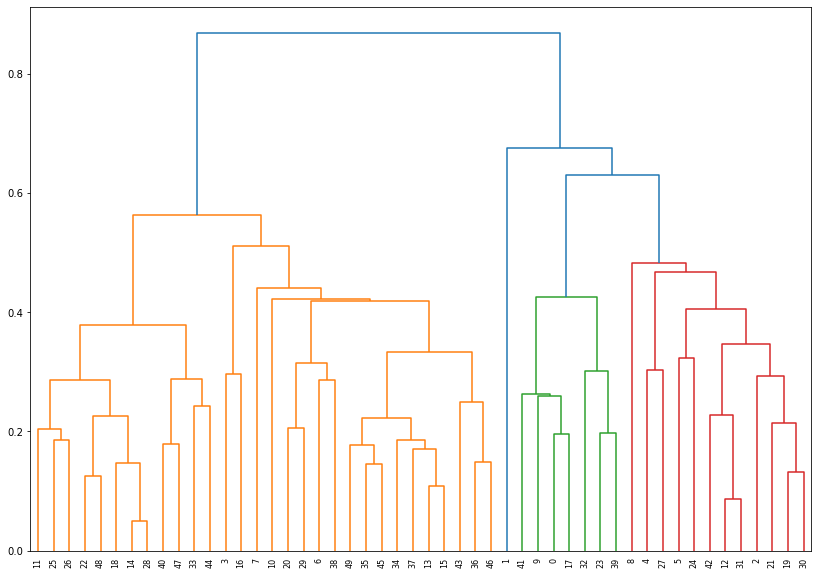

In [18]:
# create dendrogram
plt.figure(figsize = (14, 10));
dendrogram = sch.dendrogram(sch.linkage(a, method='average'))

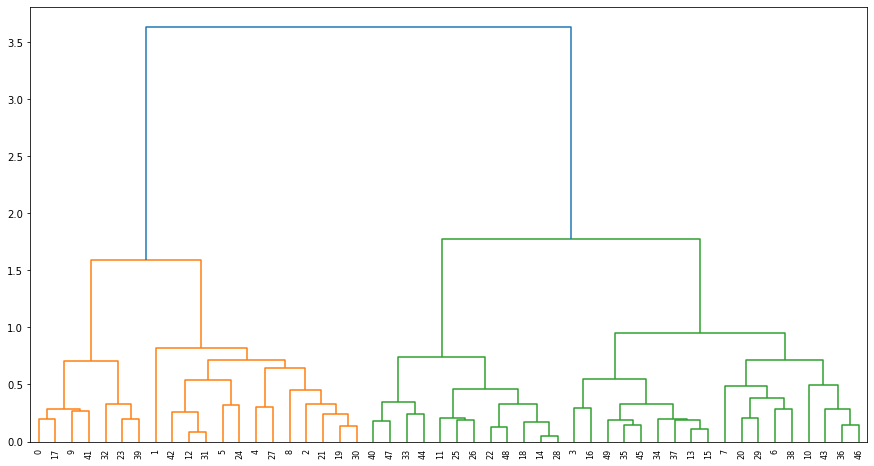

In [19]:
# create dendrogram
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(a, method='ward'))

In [20]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [22]:
# save clusters for chart
y2 = hc1.fit_predict(a)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head(6)

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1


In [23]:
# create clusters
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [24]:
# save clusters for chart
y2 = hc2.fit_predict(a)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head(6)

,Clusters
0,3
1,1
2,1
3,0
4,1
5,1


In [25]:
a2 = pd.concat([a,cc],axis=1)
a2.head(7)

,Murder,Assault,UrbanPop,Rape,Clusters
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0


In [26]:
a2.sort_values("Clusters").reset_index()

,index,Murder,Assault,UrbanPop,Rape,Clusters
0,49,0.361446,0.397260,0.474576,0.214470,0
1,29,0.397590,0.390411,0.966102,0.297158,0
2,16,0.536145,0.219178,0.338983,0.232558,0
3,15,0.313253,0.239726,0.576271,0.276486,0
4,34,0.391566,0.256849,0.728814,0.364341,0
5,13,0.385542,0.232877,0.559322,0.354005,0
6,35,0.349398,0.363014,0.610169,0.328165,0
7,36,0.246988,0.390411,0.593220,0.568475,0
8,20,0.216867,0.356164,0.898305,0.232558,0
9,10,0.271084,0.003425,0.864407,0.333333,0


In [27]:
a2['Clusters'].value_counts()

0    18
1    13
2    12
3     7
Name: Clusters, dtype: int64

# K-Means

In [28]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(a)

KMeans(n_clusters=5, random_state=0)

In [30]:
kmeans.inertia_

3.2250722560447906

In [37]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
wcss

[13.184122550256443,
 6.5968938679461955,
 5.010878493006417,
 3.683456153585913,
 3.2250722560447906,
 2.8520398885211113,
 2.5848664114310447,
 2.314201689711637,
 2.125929265181011]

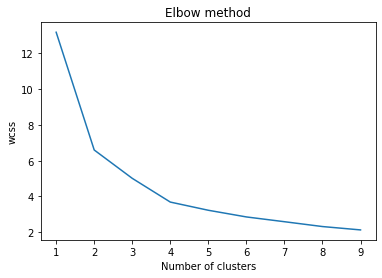

In [39]:
plt.plot(range(1, 10),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [40]:
#Build Cluster algorithm
cc2 = KMeans(4, random_state=8)
cc2.fit(a)

KMeans(n_clusters=4, random_state=8)

In [41]:
cc2.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [42]:
a# Converting array to dataframe
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [45]:
a2 = pd.concat([a,df2], axis=1)
a2.head(4)

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,1
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1


In [46]:
a2["clusters"].value_counts()

0    17
2    13
3    12
1     8
Name: clusters, dtype: int64

In [47]:
a2.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
0,0.304394,0.329371,0.705882,0.310990
1,0.791416,0.680223,0.368644,0.364664
2,0.168675,0.114858,0.340287,0.126019
3,0.612450,0.750000,0.754237,0.679802


# DBSCAN

In [48]:
array = a.values

In [51]:
stscaler = StandardScaler().fit(array)
X2 = stscaler.transform(array)
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [53]:
dbscan2 = DBSCAN(eps=0.95, min_samples=5)
dbscan2.fit(X2)

DBSCAN(eps=0.95)

In [54]:
#Noisy samples are given the label -1.
dbscan2.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [55]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
-1            30
 0            20
dtype: int64

In [56]:
a3 = pd.concat([a,c2],axis=1)
a3

,Murder,Assault,UrbanPop,Rape,Cluster ID
0,0.746988,0.654110,0.440678,0.359173,-1
1,0.554217,0.746575,0.271186,0.961240,-1
2,0.439759,0.852740,0.813559,0.612403,-1
3,0.481928,0.496575,0.305085,0.315245,-1
4,0.493976,0.791096,1.000000,0.860465,-1
5,0.427711,0.544521,0.779661,0.811370,-1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,-1
8,0.879518,0.993151,0.813559,0.635659,-1
9,1.000000,0.568493,0.474576,0.478036,-1


# Q2 Airlines

In [63]:
df = pd.read_csv(r"C:\Users\pawar\OneDrive\Desktop\Excelr Assignments\Assignment 7\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [65]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [66]:
df.shape

(3999, 12)

In [69]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

No null value in given dataset.

# Hierachy

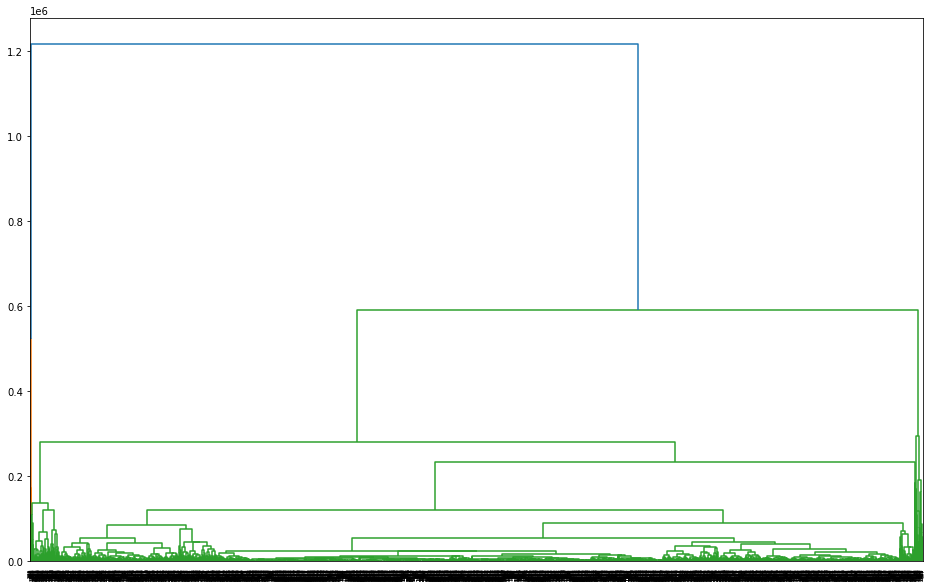

In [73]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))

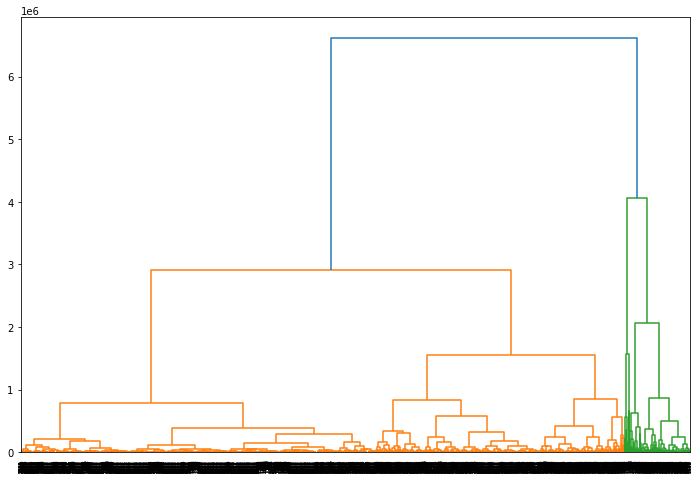

In [75]:
plt.figure(figsize = (12,8));
dendogram = sch.dendrogram(sch.linkage(df, method ="ward"))

In [76]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [77]:
# save clusters for chart
y2 = hc1.fit_predict(df)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head(6)

,Clusters
0,2
1,2
2,2
3,2
4,2
5,2


In [78]:
# create clusters
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [81]:
a2 = hc2.fit_predict(df)
b= pd.DataFrame(a2,columns=["clusters"])
b.head(5)

,clusters
0,3
1,3
2,3
3,3
4,1


In [83]:
df1 = pd.concat([df,b], axis=1)
df1.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [85]:
df2.sort_values("clusters").reset_index()

,index,clusters
0,24,0
1,46,0
2,45,0
3,43,0
4,38,0
5,37,0
6,36,0
7,35,0
8,34,0
9,29,0


In [87]:
df2["clusters"].value_counts()

0    17
2    13
3    12
1     8
Name: clusters, dtype: int64

# K-Mean

In [88]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [90]:
kmeans.inertia_

5775051202470.375

In [100]:
wcss = []
 
for i in range (1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    


In [102]:
wcss

[42967206847420.69,
 20828852094270.246,
 11794254039243.77,
 7554668286111.57,
 5775051202470.375,
 4546507928780.687,
 3702589069199.209]

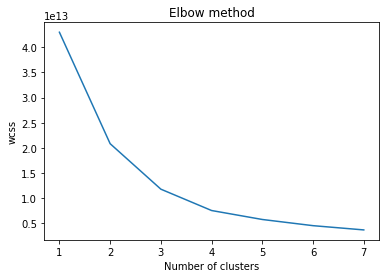

In [104]:
plt.plot(range(1, 8),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [105]:
#Build Cluster algorithm
cc2 = KMeans(4, random_state=8)
cc2.fit(df)

KMeans(n_clusters=4, random_state=8)

In [106]:
cc2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
# Converting array to dataframe
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [109]:
a2 = pd.concat([df,df2], axis=1)
a2.head(4)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0


In [110]:
a2["clusters"].value_counts()

0    2800
3     988
1     185
2      26
Name: clusters, dtype: int64

In [111]:
a2.groupby('clusters').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,,
0,2194.472500,30832.309643,101.988571,1.665714,1.016429,1.005000,10077.510000,9.314643,290.848571,0.884643,3785.443929,0.323929
1,1245.600000,323009.848649,337.248649,3.145946,1.016216,1.000000,43644.118919,18.583784,1283.335135,3.881081,5532.583784,0.627027
2,863.423077,842320.230769,512.692308,3.346154,1.000000,1.115385,57797.192308,22.730769,1845.884615,6.961538,6463.000000,0.846154
3,1680.015182,127878.637652,217.636640,2.938259,1.009109,1.032389,31142.027328,16.483806,748.964575,2.142713,4736.143725,0.441296


# DBSCAN

In [113]:
array=df.values

In [114]:
stscaler = StandardScaler().fit(array)
X2 = stscaler.transform(array)
X2

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [115]:
dbscan3 = DBSCAN(eps=0.98, min_samples=5)
dbscan3.fit(X2)

DBSCAN(eps=0.98)

In [116]:
#Noisy samples are given the label -1.
dbscan3.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [117]:
c3 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c3.value_counts()

Cluster ID
-1            30
 0            20
dtype: int64

In [118]:
a3 = pd.concat([df,c3],axis=1)
a3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,-1.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,-1.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-1.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,-1.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,NaN
